In [2]:
import pprint
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [3]:
USA_sales = {  
    '2015': [0,	    2000,	1200,	1700,	1700,	1700,	1700,	1700,	1700,	1730,	1712,	1900],
    '2016':	[2075,	2150,	2250,	2250,	2250,	2250,	2250,	2250,	2250,	2250,	2250,	2250],
    '2017':	[2800,	3000,	3000,	4400,	4400,	4400,	4400,	4400,	4517,	4545,	4745,	5460],
    '2018':	[6875,	7485,	8820,	6150,	11250,	11062,	16675,	21700,	29975,	20325,	24600,	32600],
    '2019':	[8325,	7650,	14625,	11925,	16350,	25025,	15650,	16025,	23025,	18612,	19301,	18612],
    '2020':	[22350,	20450,	10000,	6624,	14720,	15456,	48846,	43418,	47036,	21591,	17736,	24675],
    '2021':	[21120,	21120,	23760,	24751,	23799,	24751,	28350,	27301,	28350,	26232,	26232,	26232],
    '2022':	[37594,	36202,	89575,	40568,	39066,	39066,	37518,	38962,	37518,	46667,	44800,	48533]
}

In [4]:
# Create a DataFrame from the dictionary
df = pd.DataFrame(USA_sales)
df = df.T
df.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df.index.name = 'Year'
df['Total'] = df.sum(axis=1)
df['Running Total'] = df['Total'].cumsum()
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total,Running Total
Year,,,,,,,,,,,,,,
2015,0,2000,1200,1700,1700,1700,1700,1700,1700,1730,1712,1900,18742,18742
2016,2075,2150,2250,2250,2250,2250,2250,2250,2250,2250,2250,2250,26725,45467
2017,2800,3000,3000,4400,4400,4400,4400,4400,4517,4545,4745,5460,50067,95534
2018,6875,7485,8820,6150,11250,11062,16675,21700,29975,20325,24600,32600,197517,293051
2019,8325,7650,14625,11925,16350,25025,15650,16025,23025,18612,19301,18612,195125,488176
2020,22350,20450,10000,6624,14720,15456,48846,43418,47036,21591,17736,24675,292902,781078
2021,21120,21120,23760,24751,23799,24751,28350,27301,28350,26232,26232,26232,301998,1083076
2022,37594,36202,89575,40568,39066,39066,37518,38962,37518,46667,44800,48533,536069,1619145


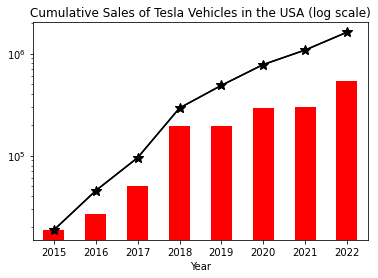

In [5]:
# line plot
fig, ax = plt.subplots()
df['Total'].plot(kind='bar', color='red')
plt.title('Total Sales of Tesla Vehicles in the USA')
# save the full image to a file
fig.savefig('.\output_images\HISTORICAL\TeslaSales.jpg', dpi=300)

df['Running Total'].plot(kind='line', marker='*', color='black', ms=10)
# title 
plt.title('Cumulative Sales of Tesla Vehicles in the USA')
fig.savefig('.\output_images\HISTORICAL\TeslaCumSales.jpg', dpi=300)

df['Running Total'].plot(kind='line', marker='*', color='black', ms=10)
plt.yscale('log')
plt.title('Cumulative Sales of Tesla Vehicles in the USA (log scale)')
fig.savefig('.\output_images\HISTORICAL\TeslaCumLogSales.jpg', dpi=300)

In [6]:
# ARIMA model to predict the next year's sales based on 2022 sales

# create a list of the 2022 sales
sales = df.loc['2022'].tolist()
sales = sales[:-2]
sales



# create a list of the months
months = df.columns.tolist()
months = months[:-2]
months

# create a DataFrame from the lists
df2022 = pd.DataFrame({'Month': months, 'Sales': sales})


# prepare the data for the ARIMA model
df2022['Sales'] = df2022['Sales'].astype(float)
df2022 = df2022.dropna()
df2022

# create the ARIMA model
model = AutoReg(df2022['Sales'], lags=1)
model_fit = model.fit()

# make predictions for the next year
predictions = model_fit.predict(start=len(df2022), end=len(df2022)+11, dynamic=False)
predictions
# convert the predictions to a DataFrame
df2023 = pd.DataFrame({'Month': months, 'Predicted Sales': predictions})
# round the predicted sales to the nearest integer
df2023['Predicted Sales'] = df2023['Predicted Sales'].round(0)
df2023.T
l = df2023['Predicted Sales'].tolist()


In [7]:
# for each month in the 2023 row, add the predicted sales
for i in range(12):
    df.loc['Pred_2023', months[i]] = l[i]
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total,Running Total
Year,,,,,,,,,,,,,,
2015,0.0,2000.0,1200.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1730.0,1712.0,1900.0,18742.0,18742.0
2016,2075.0,2150.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,26725.0,45467.0
2017,2800.0,3000.0,3000.0,4400.0,4400.0,4400.0,4400.0,4400.0,4517.0,4545.0,4745.0,5460.0,50067.0,95534.0
2018,6875.0,7485.0,8820.0,6150.0,11250.0,11062.0,16675.0,21700.0,29975.0,20325.0,24600.0,32600.0,197517.0,293051.0
2019,8325.0,7650.0,14625.0,11925.0,16350.0,25025.0,15650.0,16025.0,23025.0,18612.0,19301.0,18612.0,195125.0,488176.0
2020,22350.0,20450.0,10000.0,6624.0,14720.0,15456.0,48846.0,43418.0,47036.0,21591.0,17736.0,24675.0,292902.0,781078.0
2021,21120.0,21120.0,23760.0,24751.0,23799.0,24751.0,28350.0,27301.0,28350.0,26232.0,26232.0,26232.0,301998.0,1083076.0
2022,37594.0,36202.0,89575.0,40568.0,39066.0,39066.0,37518.0,38962.0,37518.0,46667.0,44800.0,48533.0,536069.0,1619145.0
Pred_2023,44709.0,45260.0,45181.0,45192.0,45190.0,45191.0,45191.0,45191.0,45191.0,45191.0,45191.0,45191.0,NaN,NaN


In [8]:
# predict the total sales for 2023
df.loc['Pred_2023', 'Total'] = df.loc['Pred_2023'].sum()
df
# predict the cumulative sales for 2023
df.loc['Pred_2023', 'Running Total'] = df.loc['Pred_2023', 'Total'] + df.loc['2022', 'Running Total']
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total,Running Total
Year,,,,,,,,,,,,,,
2015,0.0,2000.0,1200.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1730.0,1712.0,1900.0,18742.0,18742.0
2016,2075.0,2150.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,26725.0,45467.0
2017,2800.0,3000.0,3000.0,4400.0,4400.0,4400.0,4400.0,4400.0,4517.0,4545.0,4745.0,5460.0,50067.0,95534.0
2018,6875.0,7485.0,8820.0,6150.0,11250.0,11062.0,16675.0,21700.0,29975.0,20325.0,24600.0,32600.0,197517.0,293051.0
2019,8325.0,7650.0,14625.0,11925.0,16350.0,25025.0,15650.0,16025.0,23025.0,18612.0,19301.0,18612.0,195125.0,488176.0
2020,22350.0,20450.0,10000.0,6624.0,14720.0,15456.0,48846.0,43418.0,47036.0,21591.0,17736.0,24675.0,292902.0,781078.0
2021,21120.0,21120.0,23760.0,24751.0,23799.0,24751.0,28350.0,27301.0,28350.0,26232.0,26232.0,26232.0,301998.0,1083076.0
2022,37594.0,36202.0,89575.0,40568.0,39066.0,39066.0,37518.0,38962.0,37518.0,46667.0,44800.0,48533.0,536069.0,1619145.0
Pred_2023,44709.0,45260.0,45181.0,45192.0,45190.0,45191.0,45191.0,45191.0,45191.0,45191.0,45191.0,45191.0,541869.0,2161014.0


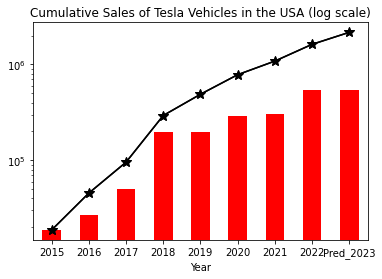

In [9]:
# line plot
fig, ax = plt.subplots()
df['Total'].plot(kind='bar', color='red')
plt.title('Total Sales of Tesla Vehicles in the USA')
# save the full image to a file
fig.savefig('.\output_images\PREDICT\PRED_TeslaSales.jpg', dpi=300)

df['Running Total'].plot(kind='line', marker='*', color='black', ms=10)
# title 
plt.title('Cumulative Sales of Tesla Vehicles in the USA')
fig.savefig('.\output_images\PREDICT\PRED_TeslaCumSales.jpg', dpi=300)

df['Running Total'].plot(kind='line', marker='*', color='black', ms=10)
plt.yscale('log')
plt.title('Cumulative Sales of Tesla Vehicles in the USA (log scale)')
fig.savefig('.\output_images\PREDICT\PRED_TeslaCumLogSales.jpg', dpi=300)

In [10]:
dfYOY = df.copy()
dfYOY = dfYOY.drop(columns=['Running Total','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
dfYOY = dfYOY.drop(index=['Pred_2023'])
# format the data to show the percentage change
dfYOY = dfYOY.pct_change()
dfYOY = dfYOY * 100
dfYOY = dfYOY.round(2)
#change Total to YOY change
dfYOY = dfYOY.rename(columns={'Total': 'YOY Change (%)'})
dfYOY

,YOY Change (%)
Year,
2015,NaN
2016,42.59
2017,87.34
2018,294.51
2019,-1.21
2020,50.11
2021,3.11
2022,77.51


In [11]:
US_Marketshare = [.11,.15,.29,1.14,1.15,1.99,2.02,3.92]
# add the market share to the DataFrame
dfYOY['US Market Share (%)'] = US_Marketshare#

dfYOY

,YOY Change (%),US Market Share (%)
Year,,
2015,NaN,0.11
2016,42.59,0.15
2017,87.34,0.29
2018,294.51,1.14
2019,-1.21,1.15
2020,50.11,1.99
2021,3.11,2.02
2022,77.51,3.92


In [12]:
#market share change
dfYOY['Market Share Change (%)'] = dfYOY['US Market Share (%)'].pct_change()
dfYOY['Market Share Change (%)'] = dfYOY['Market Share Change (%)'] * 100
dfYOY['Market Share Change (%)'] = dfYOY['Market Share Change (%)'].round(2)
dfYOY

,YOY Change (%),US Market Share (%),Market Share Change (%)
Year,,,
2015,NaN,0.11,NaN
2016,42.59,0.15,36.36
2017,87.34,0.29,93.33
2018,294.51,1.14,293.10
2019,-1.21,1.15,0.88
2020,50.11,1.99,73.04
2021,3.11,2.02,1.51
2022,77.51,3.92,94.06


In [13]:
! pip install tabulate


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
print(dfYOY.to_markdown())

|   Year |   YOY Change (%) |   US Market Share (%) |   Market Share Change (%) |
|-------:|-----------------:|----------------------:|--------------------------:|
|   2015 |           nan    |                  0.11 |                    nan    |
|   2016 |            42.59 |                  0.15 |                     36.36 |
|   2017 |            87.34 |                  0.29 |                     93.33 |
|   2018 |           294.51 |                  1.14 |                    293.1  |
|   2019 |            -1.21 |                  1.15 |                      0.88 |
|   2020 |            50.11 |                  1.99 |                     73.04 |
|   2021 |             3.11 |                  2.02 |                      1.51 |
|   2022 |            77.51 |                  3.92 |                     94.06 |


In [15]:
print(df.to_markdown())

| Year      |   Jan |   Feb |   Mar |   Apr |   May |   Jun |   Jul |   Aug |   Sep |   Oct |   Nov |   Dec |   Total |    Running Total |
|:----------|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|--------:|-----------------:|
| 2015      |     0 |  2000 |  1200 |  1700 |  1700 |  1700 |  1700 |  1700 |  1700 |  1730 |  1712 |  1900 |   18742 |  18742           |
| 2016      |  2075 |  2150 |  2250 |  2250 |  2250 |  2250 |  2250 |  2250 |  2250 |  2250 |  2250 |  2250 |   26725 |  45467           |
| 2017      |  2800 |  3000 |  3000 |  4400 |  4400 |  4400 |  4400 |  4400 |  4517 |  4545 |  4745 |  5460 |   50067 |  95534           |
| 2018      |  6875 |  7485 |  8820 |  6150 | 11250 | 11062 | 16675 | 21700 | 29975 | 20325 | 24600 | 32600 |  197517 | 293051           |
| 2019      |  8325 |  7650 | 14625 | 11925 | 16350 | 25025 | 15650 | 16025 | 23025 | 18612 | 19301 | 18612 |  195125 | 488176           |
| 2020      | 22350 | 20450

In [16]:
# nested dictionary with the data
Tesla_production_quarterly = {
    'Model S/X production':	[],
    'Model 3/Y production':	[],
    'Total production':	[],
    'Model S/X deliveries':	[],
    'Model 3/Y deliveries':	[],
    'Total deliveries':	[],
    'End of quarter operating lease vehicle count':	[],
    'Global vehicle inventory (days of supply)':	[],
    'Solar Deployment (MW)':	[],
    'Storage Deployment (MWh)':	[],
    'Store and Service Locations':	[],
    'Mobile Service Fleet':	[],
    'Supercharger Stations':	[],
    'Supercharger Connectors':	[]
}

In [17]:
# nested dictionary with the data
Tesla_production_yearly = {
    'Model S/X production':	[101553, 62931, 54805, 24390, 71177],
    'Model 3/Y production':	[152977, 302301, 454932, 906032, 1298434],
    'Total production':	    [254530, 365232, 509737, 930422, 1369611],
    'Model S/X deliveries':	[99451, 66771, 57085, 24980, 66705],
    'Model 3/Y deliveries':	[146055, 300885, 442562, 911242, 1247146],
    'Total deliveries':	    [245506, 367656, 499647, 936222, 1313851],
    'End of quarter operating lease vehicle count':	[37134, 49901, 72089, 120342, 140667],
    'Global vehicle inventory (days of supply)':	[22, 13, 15, 6, 16],
    'Solar Deployment (MW)':	[326, 173, 205, 345, 348],
    'Storage Deployment (MWh)':	[1041, 1651, 3022, 3992, 6541],
    'Store and Service Locations':	[378, 433, 523, 644,764],
    'Mobile Service Fleet':	        [411, 758, 894, 1281, 1584],
    'Supercharger Stations':	   [1421, 1821, 2564, 3476, 4678],
    'Supercharger Connectors':	[12002, 16104, 23277, 31498, 42419]
}

In [18]:
# pandas df columns ['Operational Summary''2018','2019','2020','2021','2022']
df_Tesla_production_yearly = pd.DataFrame(Tesla_production_yearly, index=['2018','2019','2020','2021','2022'])
df_Tesla_production_yearly = df_Tesla_production_yearly.T
df_Tesla_production_yearly.index.name = 'Operational Summary'
df_Tesla_production_yearly


,2018,2019,2020,2021,2022
Operational Summary,,,,,
Model S/X production,101553,62931,54805,24390,71177
Model 3/Y production,152977,302301,454932,906032,1298434
Total production,254530,365232,509737,930422,1369611
Model S/X deliveries,99451,66771,57085,24980,66705
Model 3/Y deliveries,146055,300885,442562,911242,1247146
Total deliveries,245506,367656,499647,936222,1313851
End of quarter operating lease vehicle count,37134,49901,72089,120342,140667
Global vehicle inventory (days of supply),22,13,15,6,16
Solar Deployment (MW),326,173,205,345,348


In [19]:
temp = df_Tesla_production_yearly.copy()
temp = temp.T
temp = temp.drop(columns=['End of quarter operating lease vehicle count','Global vehicle inventory (days of supply)','Solar Deployment (MW)','Storage Deployment (MWh)','Store and Service Locations','Mobile Service Fleet','Supercharger Stations','Supercharger Connectors'])

# change the order of the columns
temp = temp[['Model S/X production','Model S/X deliveries','Model 3/Y production','Model 3/Y deliveries','Total production','Total deliveries']]

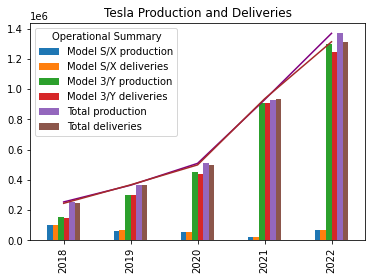

In [20]:
fig, ax = plt.subplots()
temp['Total production'].plot(kind='line', color=['Purple'],ax=ax)
temp['Total deliveries'].plot(kind='line', color=['Brown'], ax=ax)
temp.plot(kind='bar', ax=ax)
plt.title('Tesla Production and Deliveries')
fig.savefig('.\output_images\HISTORICAL\TeslaProductionAndDeliveries.jpg', dpi=300)


In [21]:
df_Tesla_production_yearly

,2018,2019,2020,2021,2022
Operational Summary,,,,,
Model S/X production,101553,62931,54805,24390,71177
Model 3/Y production,152977,302301,454932,906032,1298434
Total production,254530,365232,509737,930422,1369611
Model S/X deliveries,99451,66771,57085,24980,66705
Model 3/Y deliveries,146055,300885,442562,911242,1247146
Total deliveries,245506,367656,499647,936222,1313851
End of quarter operating lease vehicle count,37134,49901,72089,120342,140667
Global vehicle inventory (days of supply),22,13,15,6,16
Solar Deployment (MW),326,173,205,345,348


In [22]:
for index, row in df_Tesla_production_yearly.iterrows():
    old_value = row['2021']
    new_value= row['2022']
    x = (new_value - old_value) / old_value * 100
    x = round(x,3)
    df_Tesla_production_yearly.loc[index, 'YOY %'] = x

df_Tesla_production_yearly

,2018,2019,2020,2021,2022,YOY %
Operational Summary,,,,,,
Model S/X production,101553,62931,54805,24390,71177,191.829
Model 3/Y production,152977,302301,454932,906032,1298434,43.310
Total production,254530,365232,509737,930422,1369611,47.203
Model S/X deliveries,99451,66771,57085,24980,66705,167.034
Model 3/Y deliveries,146055,300885,442562,911242,1247146,36.862
Total deliveries,245506,367656,499647,936222,1313851,40.335
End of quarter operating lease vehicle count,37134,49901,72089,120342,140667,16.889
Global vehicle inventory (days of supply),22,13,15,6,16,166.667
Solar Deployment (MW),326,173,205,345,348,0.870


In [23]:
# markdown table
print(df_Tesla_production_yearly.to_markdown())

| Operational Summary                          |   2018 |   2019 |   2020 |   2021 |             2022 |   YOY % |
|:---------------------------------------------|-------:|-------:|-------:|-------:|-----------------:|--------:|
| Model S/X production                         | 101553 |  62931 |  54805 |  24390 |  71177           | 191.829 |
| Model 3/Y production                         | 152977 | 302301 | 454932 | 906032 |      1.29843e+06 |  43.31  |
| Total production                             | 254530 | 365232 | 509737 | 930422 |      1.36961e+06 |  47.203 |
| Model S/X deliveries                         |  99451 |  66771 |  57085 |  24980 |  66705           | 167.034 |
| Model 3/Y deliveries                         | 146055 | 300885 | 442562 | 911242 |      1.24715e+06 |  36.862 |
| Total deliveries                             | 245506 | 367656 | 499647 | 936222 |      1.31385e+06 |  40.335 |
| End of quarter operating lease vehicle count |  37134 |  49901 |  72089 | 120342 | 140